In [22]:
# Ensure seaborn is installed
try:
    import seaborn
except ImportError:
    import sys
    !{sys.executable} -m pip install seaborn

In [18]:
# Import necessary libraries
import pandas as pd

# Import data from CSV file
file_path = 'e:/Parth Mca 2nd sem/Data Science/Data Science Assignment/mouse_viral_study.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the data
print(data.head(19))

    Med_1_mL  Med_2_mL  Virus Present
0   6.508231  8.582531              0
1   4.126116  3.073459              1
2   6.427870  6.369758              0
3   3.672953  4.905215              1
4   1.580321  2.440562              1
5   2.158224  2.745451              1
6   8.172223  7.328995              0
7   8.719652  6.228618              0
8   6.779079  6.630667              0
9   3.043633  4.642650              1
10  1.713876  3.518856              1
11  2.020124  3.403189              1
12  4.055749  3.124243              1
13  3.630158  3.748966              1
14  3.053635  4.872666              1
15  8.392229  8.110502              0
16  6.176984  7.949241              0
17  7.286233  7.243547              0
18  7.481510  6.670184              0


In [16]:
# Detect and remove outliers using Z-score method
from scipy.stats import zscore

# Ensure the dataset is not empty
if data.empty:
    raise ValueError('The dataset is empty. Please check the input file.')

# Calculate Z-scores for numeric columns
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
if numeric_cols.empty:
    print('Warning: No numeric columns found in the dataset. Skipping Z-score calculation.')
else:
    z_scores = data[numeric_cols].apply(zscore)

    # Ensure z_scores is always a DataFrame
    z_scores = pd.DataFrame(z_scores, columns=numeric_cols)

    # Filter rows where all Z-scores are within the threshold (e.g., |Z| < 3)
    threshold = 3
    filtered_data = data[(z_scores.abs() < threshold).all(axis=1)]

    # Display the shape of the data before and after outlier removal
    print(f'Original data shape: {data.shape}')
    print(f'Filtered data shape: {filtered_data.shape}')

    # Update the data variable with filtered data
    data = filtered_data

Original data shape: (400, 3)
Filtered data shape: (400, 3)


In [17]:
# Detect and remove outliers using the IQR method

# Ensure the dataset is not empty
if data.empty:
    raise ValueError('The dataset is empty. Please check the input file.')

# Calculate IQR for numeric columns
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
if numeric_cols.empty:
    print('Warning: No numeric columns found in the dataset. Skipping IQR-based outlier removal.')
else:
    Q1 = data[numeric_cols].quantile(0.25)
    Q3 = data[numeric_cols].quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter rows within the bounds
    filtered_data = data[~((data[numeric_cols] < lower_bound) | (data[numeric_cols] > upper_bound)).any(axis=1)]

    # Display the shape of the data before and after outlier removal
    print(f'Original data shape: {data.shape}')
    print(f'Filtered data shape: {filtered_data.shape}')

    # Update the data variable with filtered data
    data = filtered_data

Original data shape: (400, 3)
Filtered data shape: (400, 3)


In [2]:
# Export the data to a new CSV file after processing
output_path = 'e:/Parth Mca 2nd sem/Data Science/Data Science Assignment/processed_internet_usage.csv'
data.to_csv(output_path, index=False)
print(f'Data exported successfully to {output_path}')

Data exported successfully to e:/Parth Mca 2nd sem/Data Science/Data Science Assignment/processed_internet_usage.csv


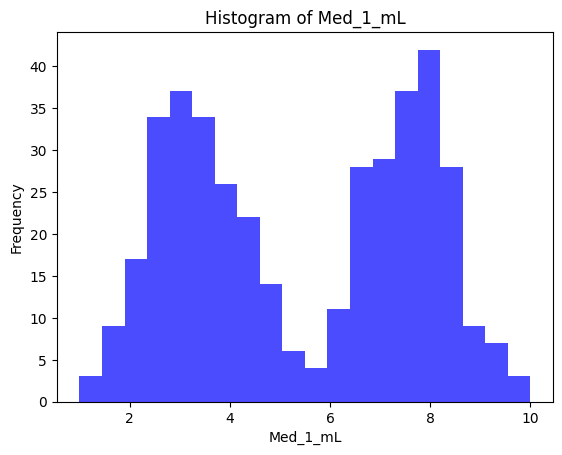

In [19]:
# Data Visualization using Matplotlib
import matplotlib.pyplot as plt

# Ensure the dataset is not empty
if data.empty:
    raise ValueError('The dataset is empty. Please check the input file.')

# Plot a histogram for the first numeric column
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
if not numeric_cols.empty:
    plt.hist(data[numeric_cols[0]], bins=20, color='blue', alpha=0.7)
    plt.title(f'Histogram of {numeric_cols[0]}')
    plt.xlabel(numeric_cols[0])
    plt.ylabel('Frequency')
    plt.show()
else:
    print('No numeric columns available for Matplotlib visualization.')

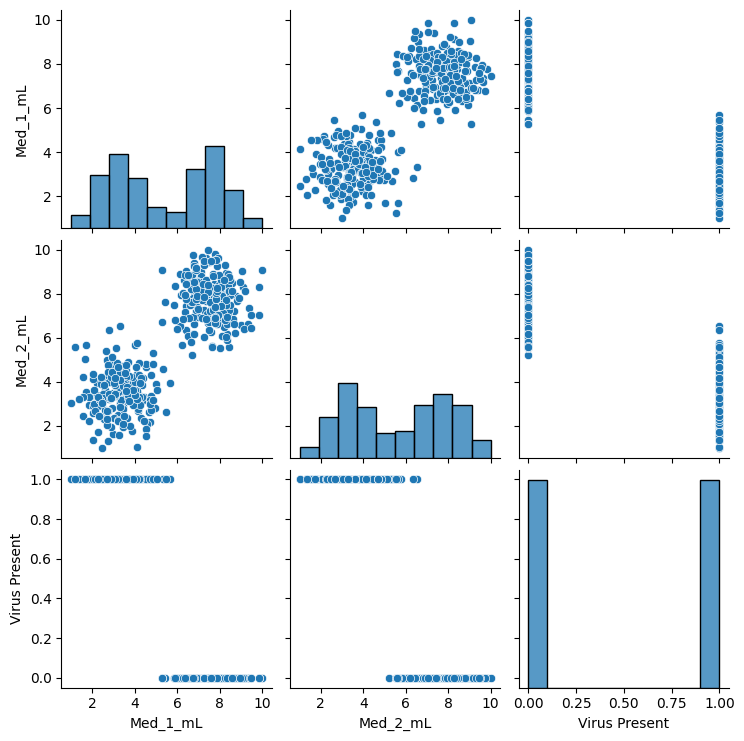

In [23]:
# Data Visualization using Seaborn
import seaborn as sns

# Ensure the dataset is not empty
if data.empty:
    raise ValueError('The dataset is empty. Please check the input file.')

# Plot a pairplot for numeric columns
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
if len(numeric_cols) > 1:
    sns.pairplot(data[numeric_cols])
    plt.show()
else:
    print('Not enough numeric columns available for Seaborn pairplot.')